In [1]:
import numpy as np
import pickle 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
import time 

### Exp 1 Likelihood  

In [113]:
# N =9, knowledge number = 12 
# proportion / openness / k 
# platform fitness / aggregation / uniqueness / s fitness / aggregation / uniqueness / g fitness / aggregation / uniqueness

In [114]:
ress = []
for copy in range(10, 20):
    try:
        with open(
            "./simulationResults/output_multistate_platformResilience_100_False_1_1_1_30_change_openness_%d"%copy, 
            "rb"
        ) as f:
            ress.append(pickle.load(f))
    except:
        print(copy)

18
19


In [115]:
# step, 1st to 100th 
ress[0][0][1].shape

(100, 100)

In [105]:
line_style = ["solid", "dashed", "dotted"]
labels = ["All S", "Hybrid", "All G"]

ylim = {
    0:[0, 1.2], 
    2:[0.9, 1.7],
    4:[0.9, 2], 
}

ysticks = {
    0:[0, 0.3, 0.6, 0.9, 1.2], 
    2:[0.9, 1.1, 1.3, 1.5, 1.7], 
    4:[0.9, 1.2, 1.5, 1.8]
}

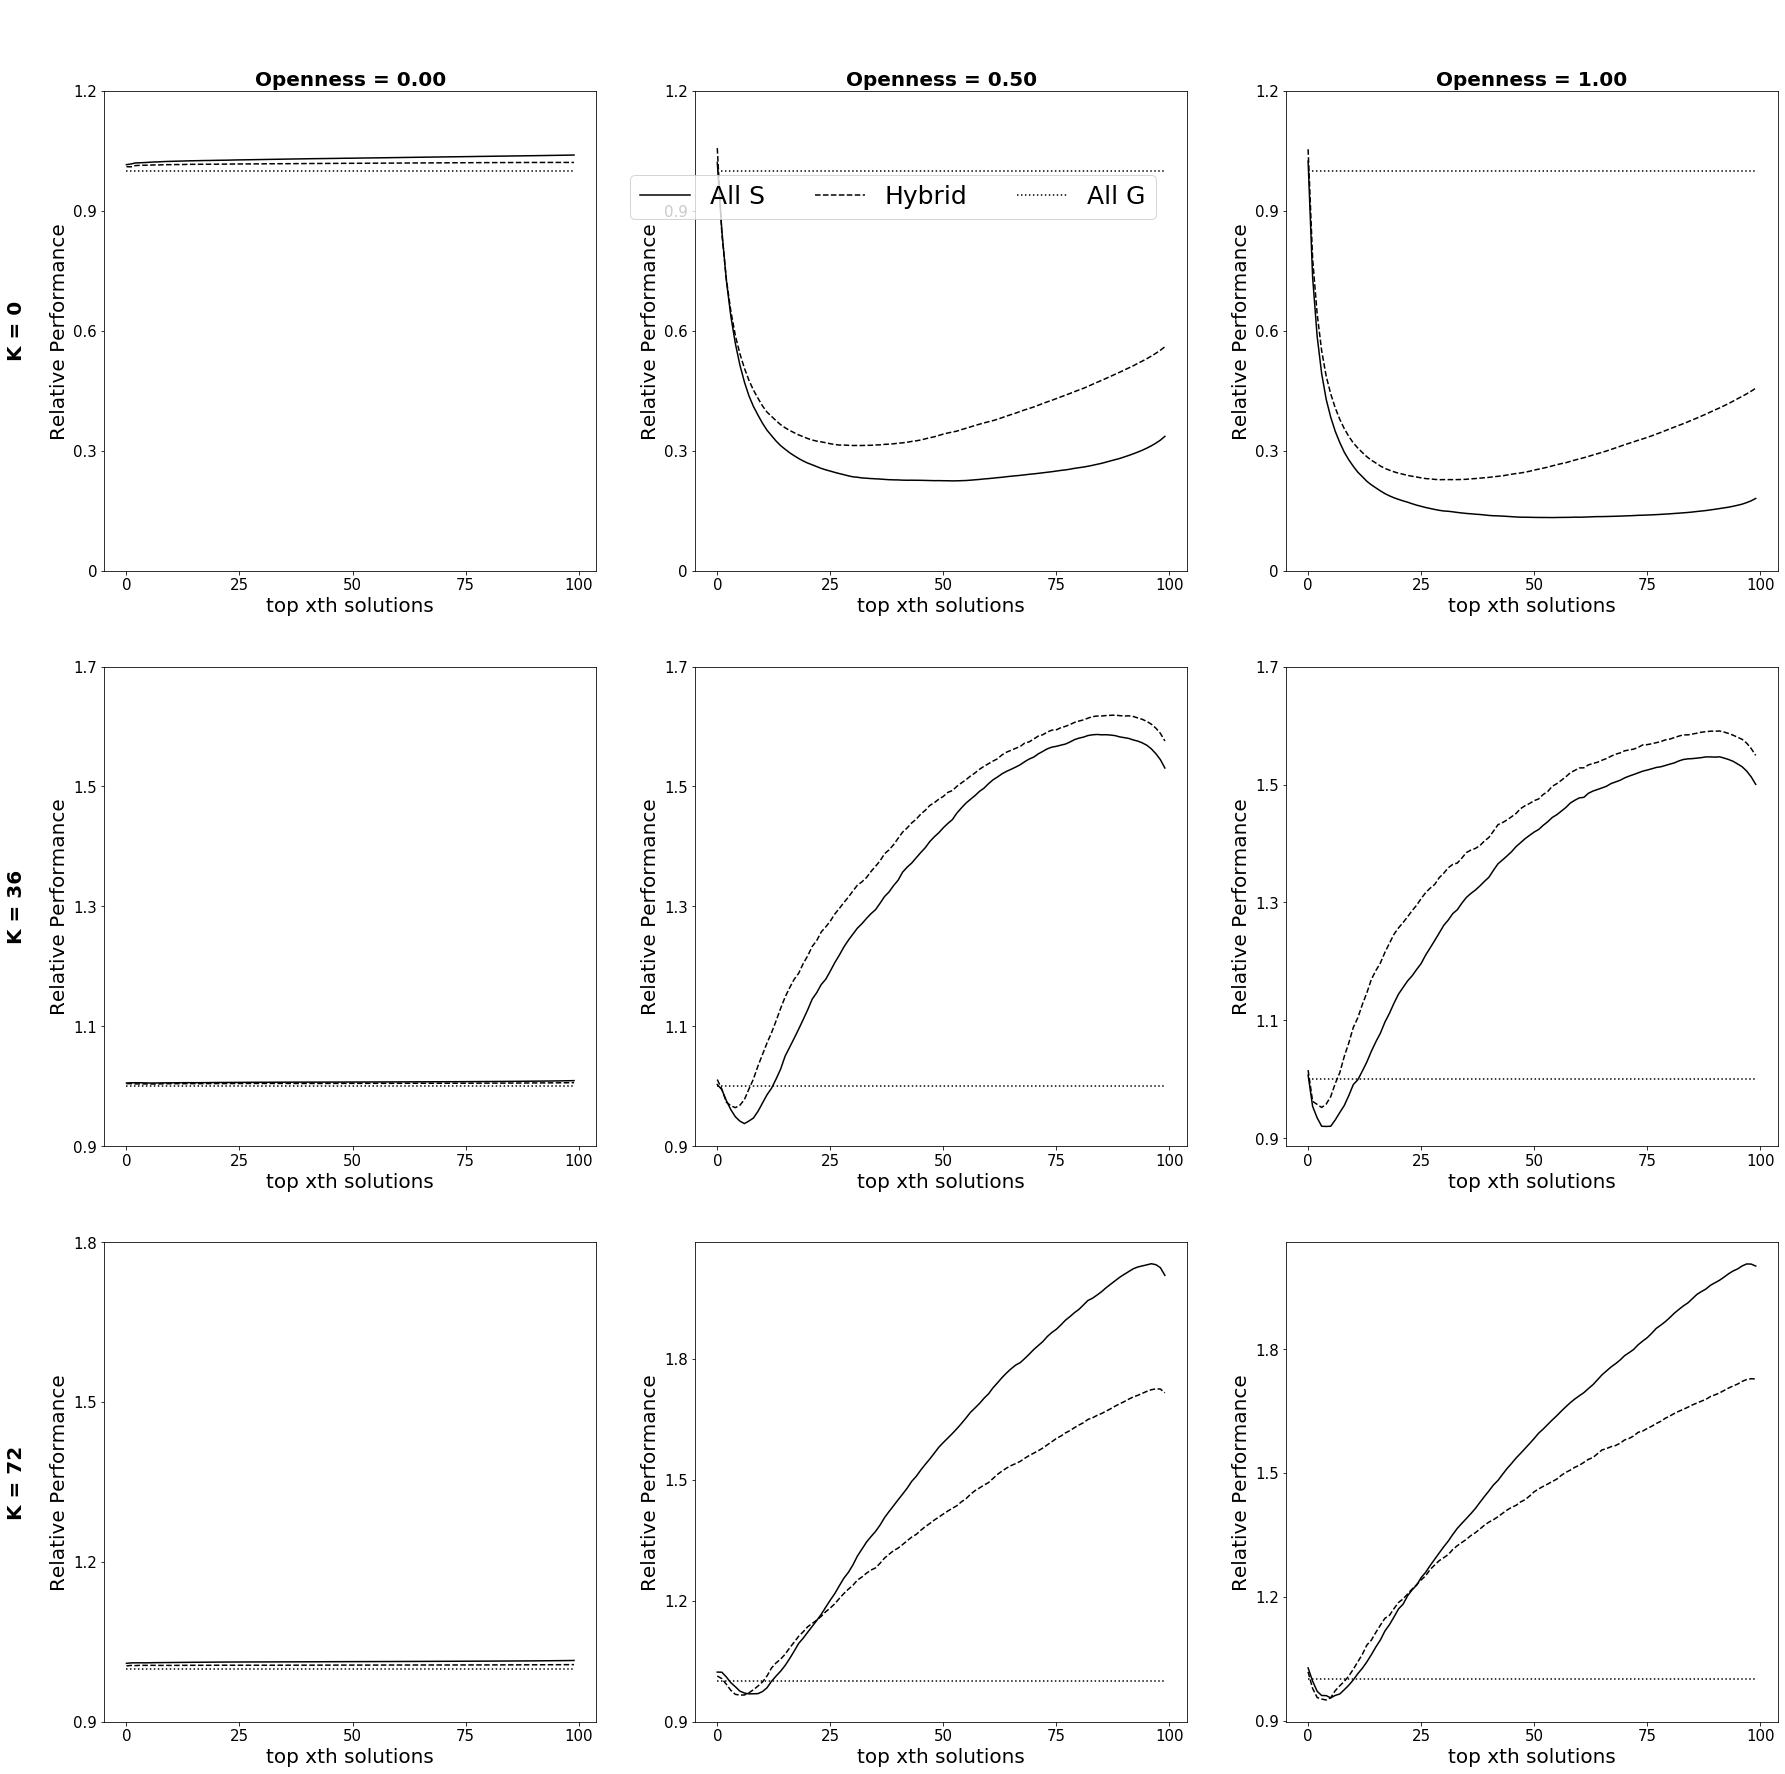

In [118]:
f = plt.figure(figsize=(30, 30))

# platform aggregation 

for k in [0, 2, 4]:
    for openness in [0, 2, 4]:
        ax = f.add_subplot(3, 3, k//2*3+openness//2+1)
        
        proportion = 4 
        baseline = []
        for copy in range(len(ress)):
            baseline.append(
                ress[copy][proportion*25+openness*5+k][1][-1].tolist()
            )
        baseline = np.mean(np.array(baseline), axis=0)
#         baseline = np.ones(100)
        
        for proportion in [0, 2, 4]:
            temp = []
            for copy in range(len(ress)):
                temp.append(ress[copy][proportion*25+openness*5+k][1][-1].tolist())
            ax.plot(
                np.mean(np.array(temp), axis=0)/baseline, color="black", linestyle=line_style[proportion//2], 
                label=labels[proportion//2]
            )
        if k==0:
            ax.annotate("Openness = %.2f"%(openness*0.25),  xy=(0.5, 1), xytext=(0, 5),xycoords='axes fraction', 
                        textcoords='offset points', ha='center', va='baseline', fontsize="20", fontweight="bold")
        if openness==0:
            ax.annotate("K = %d"%(k*18), xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 20, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90, fontsize="20", fontweight='bold')
        
        ax.set_xlabel("top xth solutions", fontsize="20")
        ax.set_xticks([0, 25, 50, 75, 100]) 
        ax.set_xticklabels([0, 25, 50, 75, 100], fontsize="15")  
        
#         ax.set_ylim(ylim[k][0], ylim[k][1])
        ax.set_ylabel('Relative Performance', fontsize="20")
        ax.set_yticks(ysticks[k])
        ax.set_yticklabels(ysticks[k], fontsize="15")  
        
handles, labels = ax.get_legend_handles_labels()
f.legend(handles, labels, loc='upper center', fontsize="25",ncol=3,borderaxespad=7)

plt.savefig("./ICIS_GST_across_openness.png")

In [151]:
line_style = ["solid", "dashed", "dotted"]
labels = ["All S", "Hybrid", "All G"]

ylim = {
    0:[0.8, 1.0], 
    1:[0, 5],
    2:[0, 80], 
}

ysticks = {
    0:[0.8, 0.85, 0.9, 0.95, 1.0], 
    1:[0, 1, 2, 3, 4, 5], 
    2:[0, 20, 40, 60, 80]
}

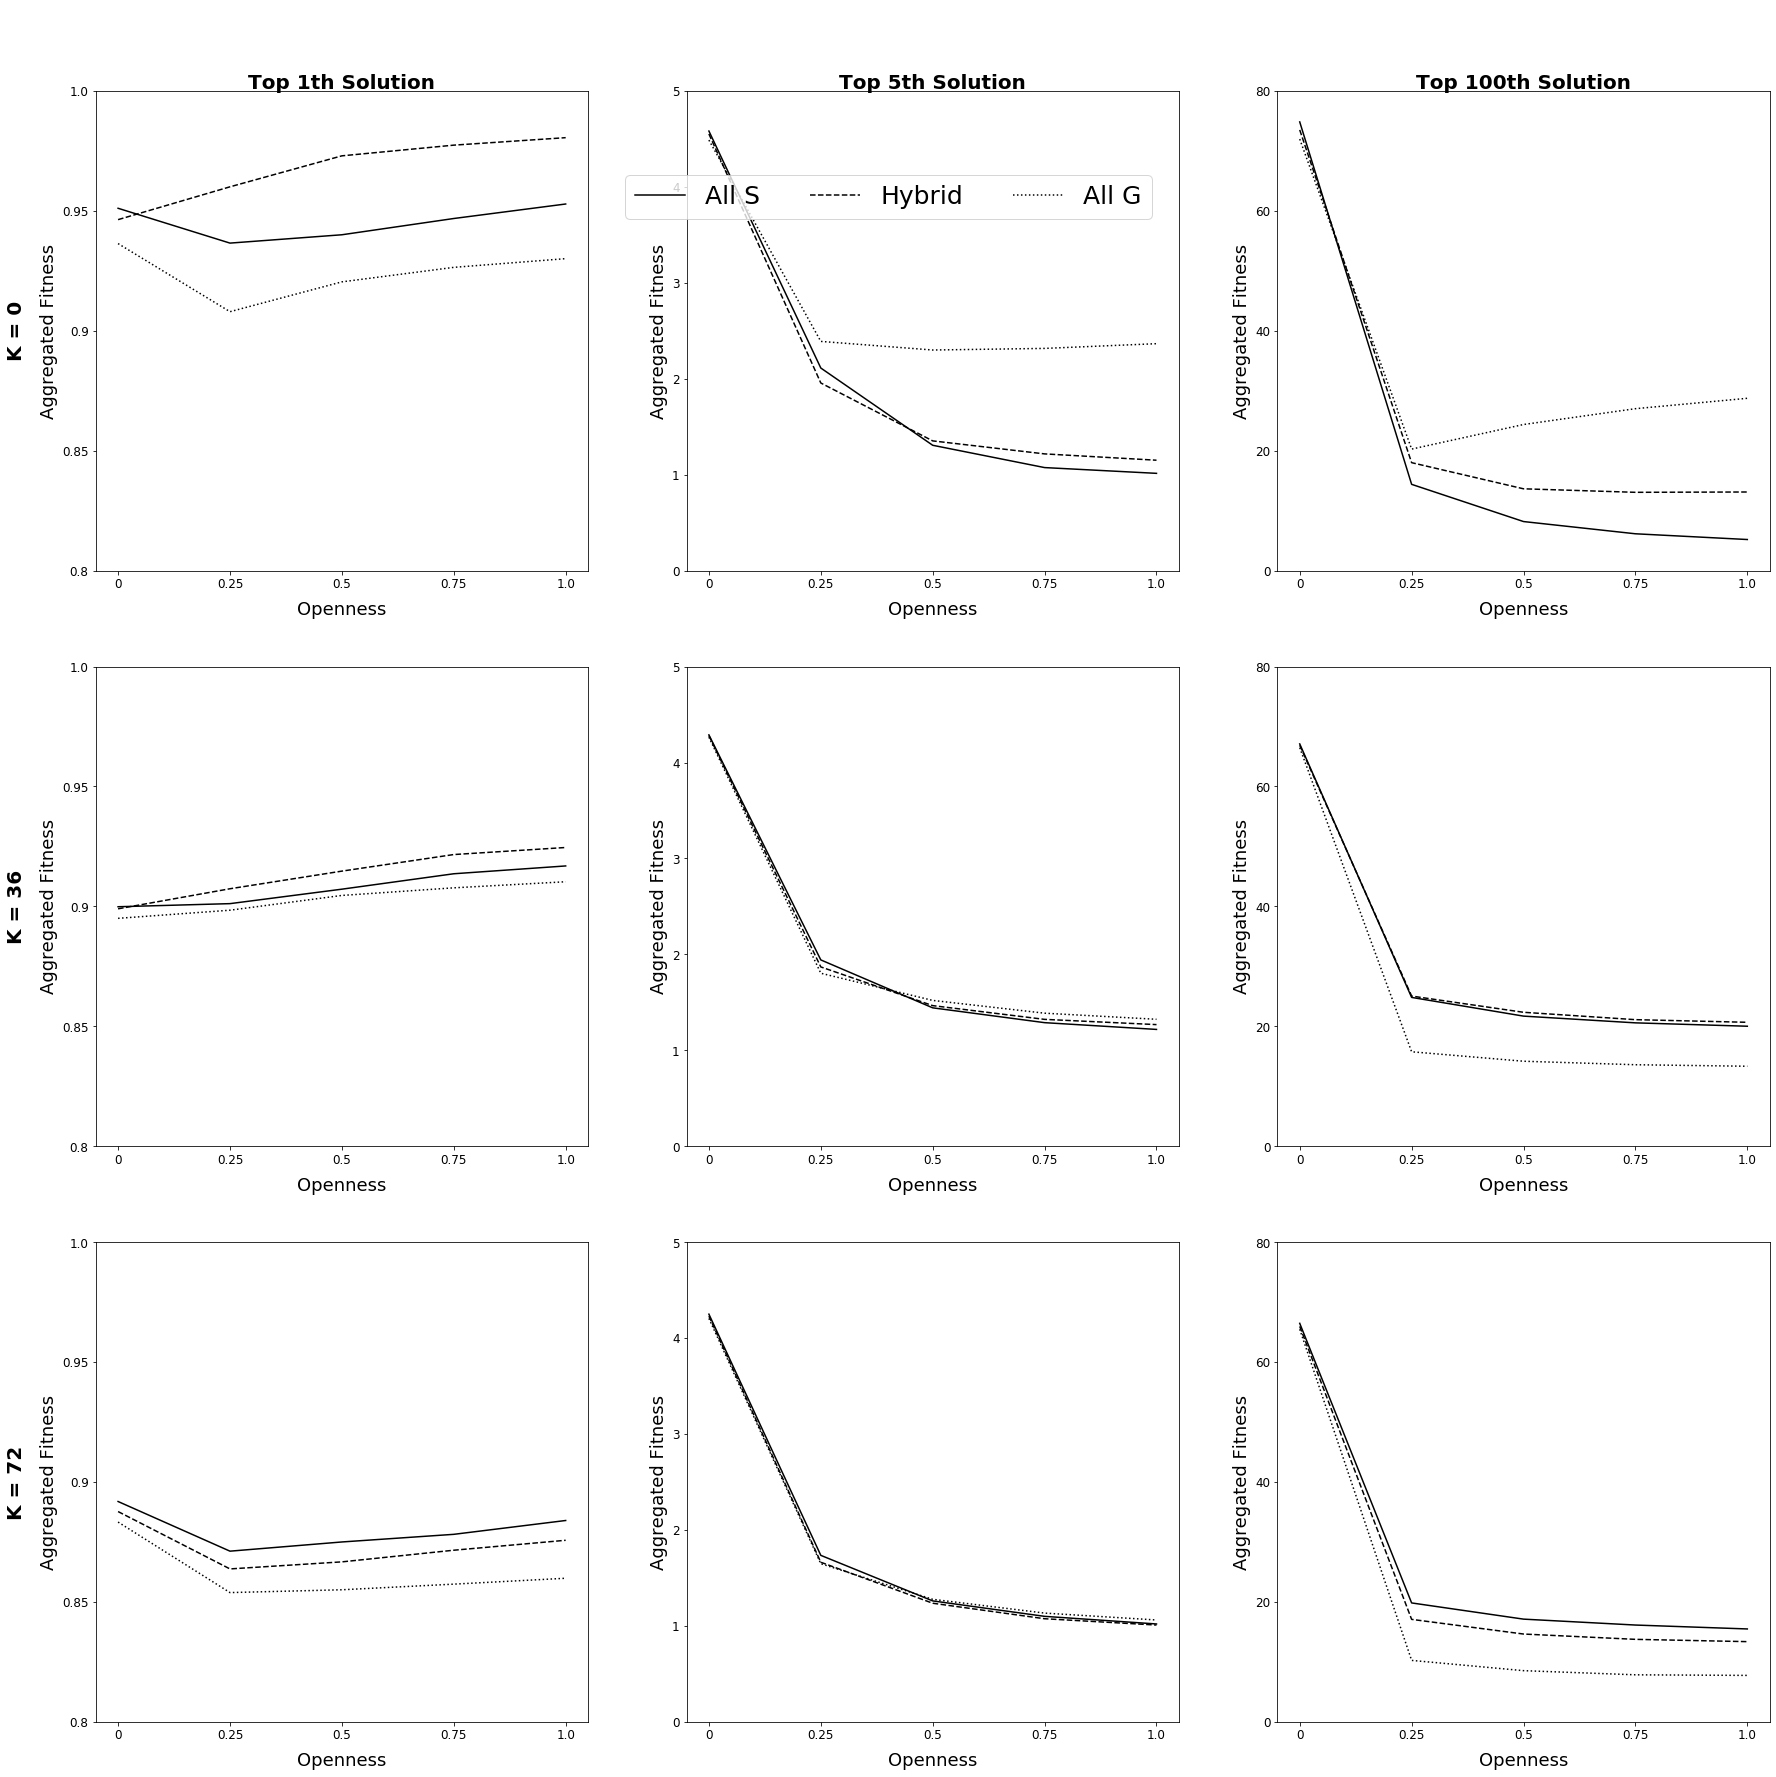

In [163]:
f = plt.figure(figsize=(30, 30))

# platform aggregation 

# used_value
index = [0, 4, 99]

for k in [0, 2, 4]:
    for cur in range(len(index)):
        ax = f.add_subplot(3, len(index), k//2*(len(index))+cur+1)
    
        for proportion in range(5):
            if proportion not in [0, 2, 4]:
                continue
                
            input_res = []
            for openness in range(5):
                
                temp = []
                for copy in range(len(ress)):
                    temp.append(ress[copy][proportion*25+openness*5+k][1][-1][index[cur]])
                
                input_res.append(np.mean(temp))
        
            ax.plot(input_res, color="black", linestyle=line_style[proportion//2], 
                label=labels[proportion//2])
        ax.set_xlabel("Openness", fontsize="18", labelpad=10)
        plt.xticks([0, 1, 2, 3, 4], [0, 0.25, 0.5, 0.75, 1.0], fontsize="12")
        
        ax.set_ylim(ylim[cur][0], ylim[cur][1])
        ax.set_ylabel('Aggregated Fitness', fontsize="18")
        ax.set_yticks(zticks[cur])
        ax.set_yticklabels(zticks[cur],fontsize="12")

#         plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.02)
        
#         pad = 5
        
        if k==0:
            ax.annotate("Top %dth Solution"%(index[cur]+1),  xy=(0.5, 0.9), xytext=(0, 50),xycoords='axes fraction', 
                        textcoords='offset points', ha='center', va='baseline', fontsize="20", fontweight="bold")
        if cur==0:
            ax.annotate("K = %d"%(k*18), xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 10, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90, fontsize="20", fontweight='bold')
handles, labels = ax.get_legend_handles_labels()
f.legend(handles, labels, loc='upper center', fontsize="25",ncol=3,borderaxespad=7)
plt.savefig("./ICIS_GST_across_openness_v2.png")

### Exp2 direction

In [59]:
# N =9, knowledge number = 12, proportion =0.5  
# g->s p, s->s p, k 
# platform fitness / aggregation / uniqueness / s fitness / aggregation / uniqueness / g fitness / aggregation / uniqueness

In [60]:
ress = []
for copy in range(10, 20):
    try:
        with open(
            "./simulationResults/output_multistate_platformResilience_100_False_1_1_1_30_change_direction_%d"%copy, 
            "rb"
        ) as f:
            ress.append(pickle.load(f))
    except:
        print(copy)

17
18
19


In [71]:
zlim = {
    0:[0.8, 1], 
    1:[4, 20], 
    2:[10, 35], 
}

zticks = {
    0:[0.8, 0.85, 0.9, 0.95, 1.0], 
    1:[4, 8, 12, 16, 20], 
    2:[10, 15, 20, 25, 30, 35], 
}

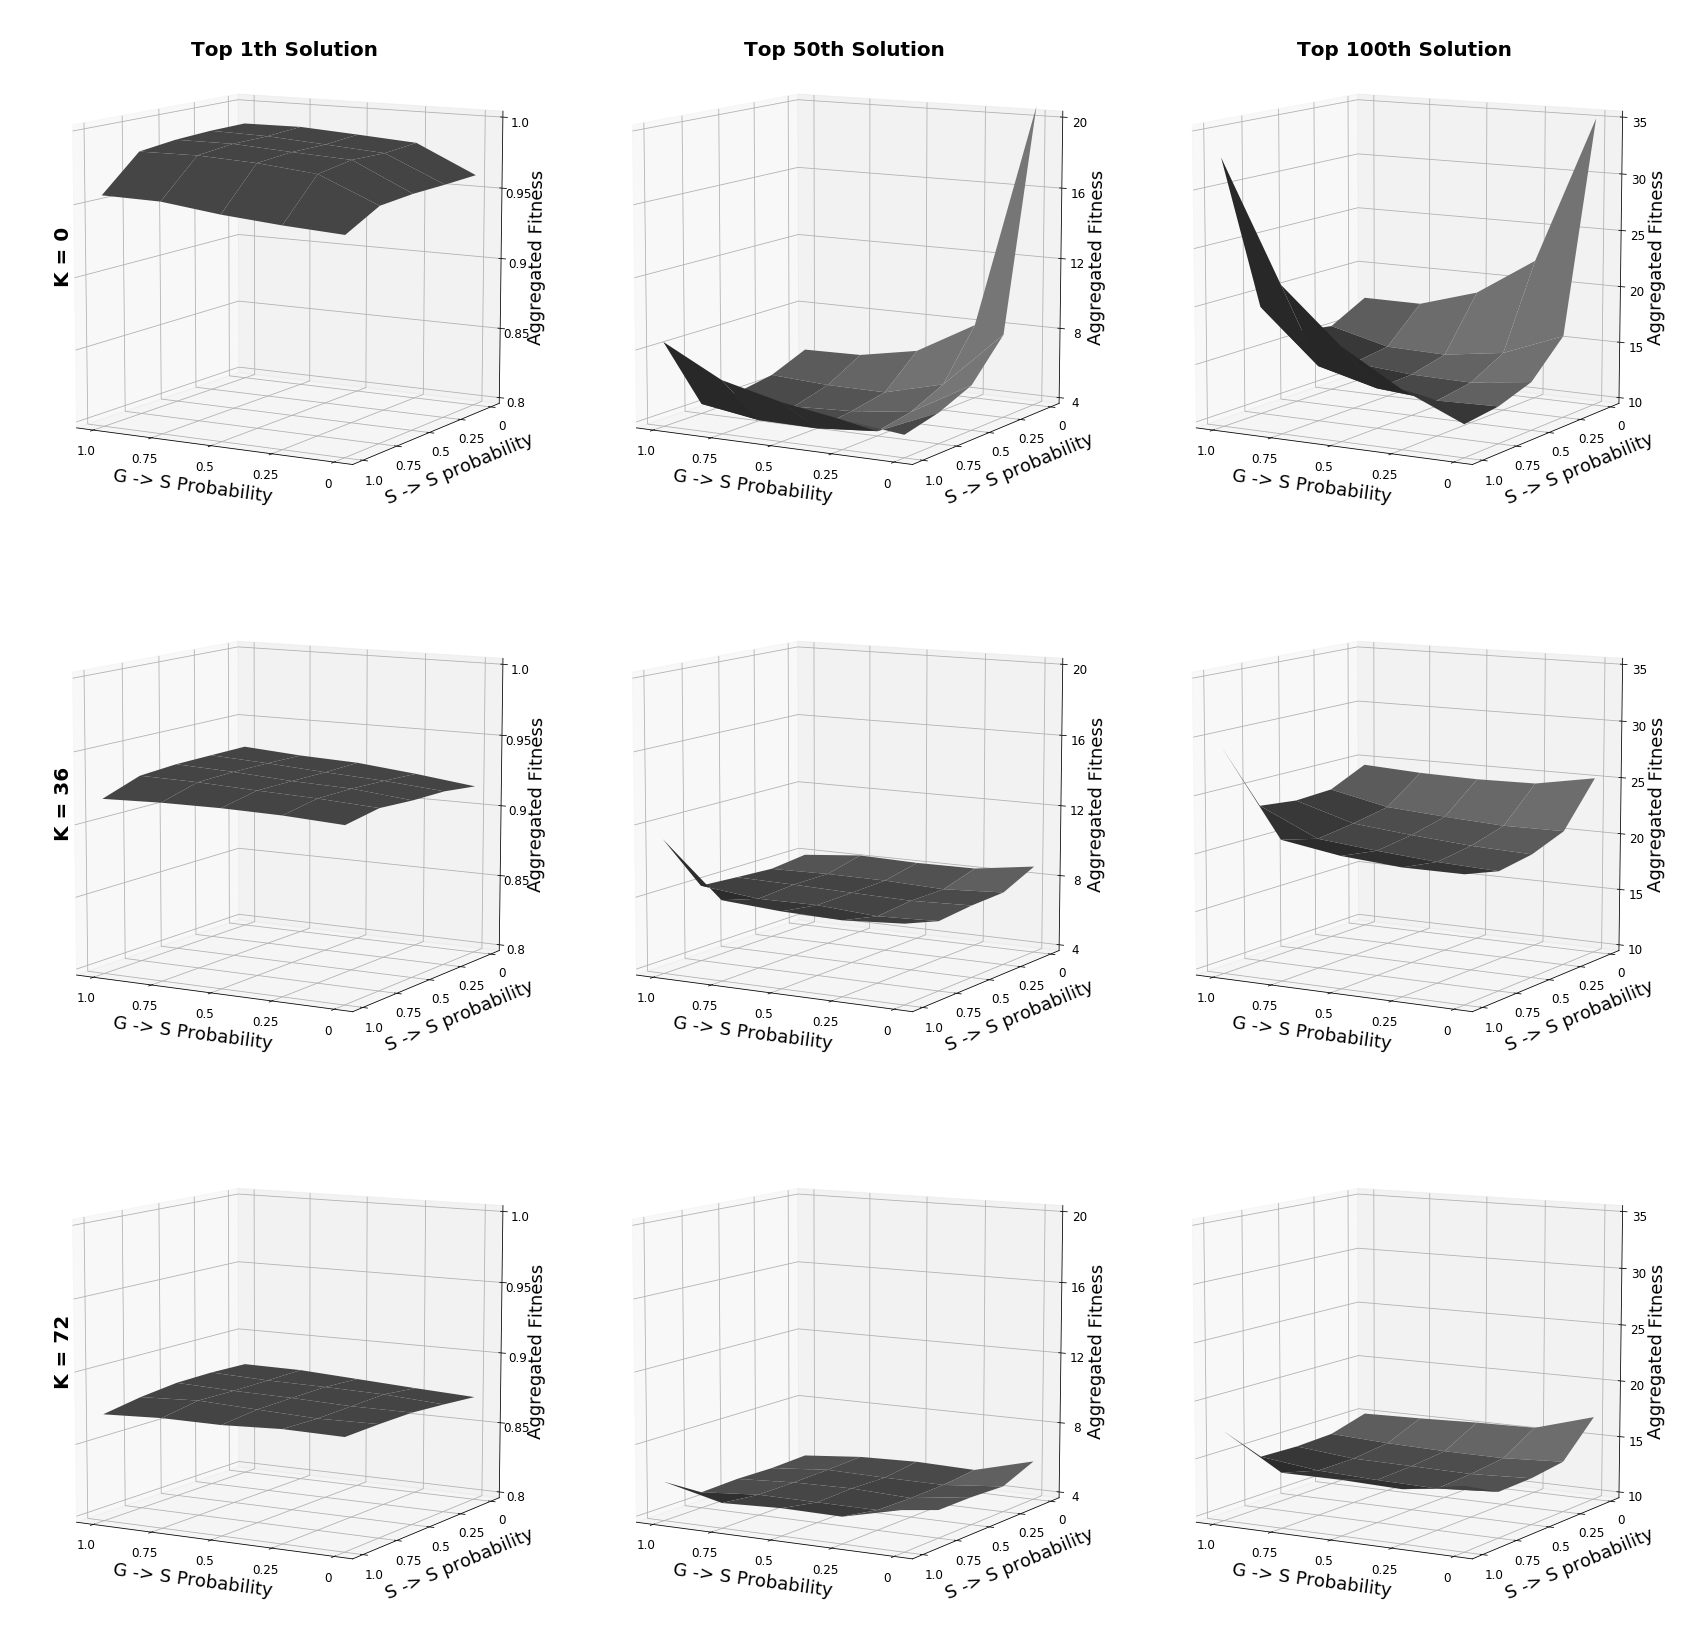

In [89]:
f = plt.figure(figsize=(30, 30))

# platform aggregation 

# used_value
index = [0, 49, 99]

for k in [0, 2, 4]:
    for cur in range(len(index)):
        ax = f.add_subplot(3, len(index), k//2*(len(index))+cur+1, projection="3d")
        
        x = []
        y = []
        z = []
        for g_p in range(5):
            for s_p in range(5):
                x.append(g_p)
                y.append(s_p)
                
                temp = []
                for copy in range(len(ress)):
                    temp.append(ress[copy][g_p*25+s_p*5+k][1][-1][index[cur]])
                
                z.append(np.mean(temp))
        z = np.array(z).reshape(5, 5)
        x = np.array(x).reshape(5, 5)
        y = np.array(y).reshape(5, 5)
        
#         print(z)


        ax.plot_surface(x,y,z, color="grey")

        ax.view_init(elev=10., azim=120)

#         ax.set_zlim(0.7, 1)
        ax.set_xlabel("G -> S Probability", fontsize="18", labelpad=10)
        plt.xticks([0, 1, 2, 3, 4], [0, 0.25, 0.5, 0.75, 1.0], fontsize="12")
        ax.set_ylabel("S -> S probability", fontsize="18", labelpad=10)
        plt.yticks([0, 1, 2, 3, 4], [0, 0.25, 0.5, 0.75, 1.0], fontsize="12")
        
        ax.set_zlim(zlim[cur][0], zlim[cur][1])
        ax.set_zlabel('Aggregated Fitness', fontsize="18")
        ax.set_zticks(zticks[cur])
        ax.set_zticklabels(zticks[cur],fontsize="12")

        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.02)
        
        pad = 5
        
        if k==0:
            ax.annotate("Top %dth Solution"%(index[cur]+1),  xy=(0.5, 0.9), xytext=(0, 5),xycoords='axes fraction', 
                        textcoords='offset points', ha='center', va='baseline', fontsize="20", fontweight="bold")
        if cur==0:
            ax.annotate("K = %d"%(k*18), xy=(0, 0.5), xytext=(-ax.zaxis.labelpad - 450, 0),
                xycoords=ax.zaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90, fontsize="20", fontweight='bold')
plt.savefig("./ICIS_GST_across_directions.png")

### Exp3 Error 

In [108]:
# N =9, knowledge number = 12, proportion =0.5  
# proportion, error_probability, k 
# platform fitness / aggregation / uniqueness / s fitness / aggregation / uniqueness / g fitness / aggregation / uniqueness

In [164]:
ress = []
for copy in range(10, 20):
    try:
        with open(
            "./simulationResults/output_multistate_platformResilience_100_False_1_1_1_30_change_quality_%d"%copy, 
            "rb"
        ) as f:
            ress.append(pickle.load(f))
    except:
        print(copy)

16
17
18
19


In [172]:
line_style = ["solid", "dashed", "dotted"]
labels = ["All S", "Hybrid", "All G"]

ylim = {
    0:[0.8, 1], 
    1:[0.9, 1.7],
    2:[0.9, 2], 
}

ysticks = {
    0:[0.8, 0.85, 0.9, 0.95, 1.0], 
    1:[0.9, 1.1, 1.3, 1.5, 1.7], 
    2:[0.9, 1.2, 1.5, 1.8]
}

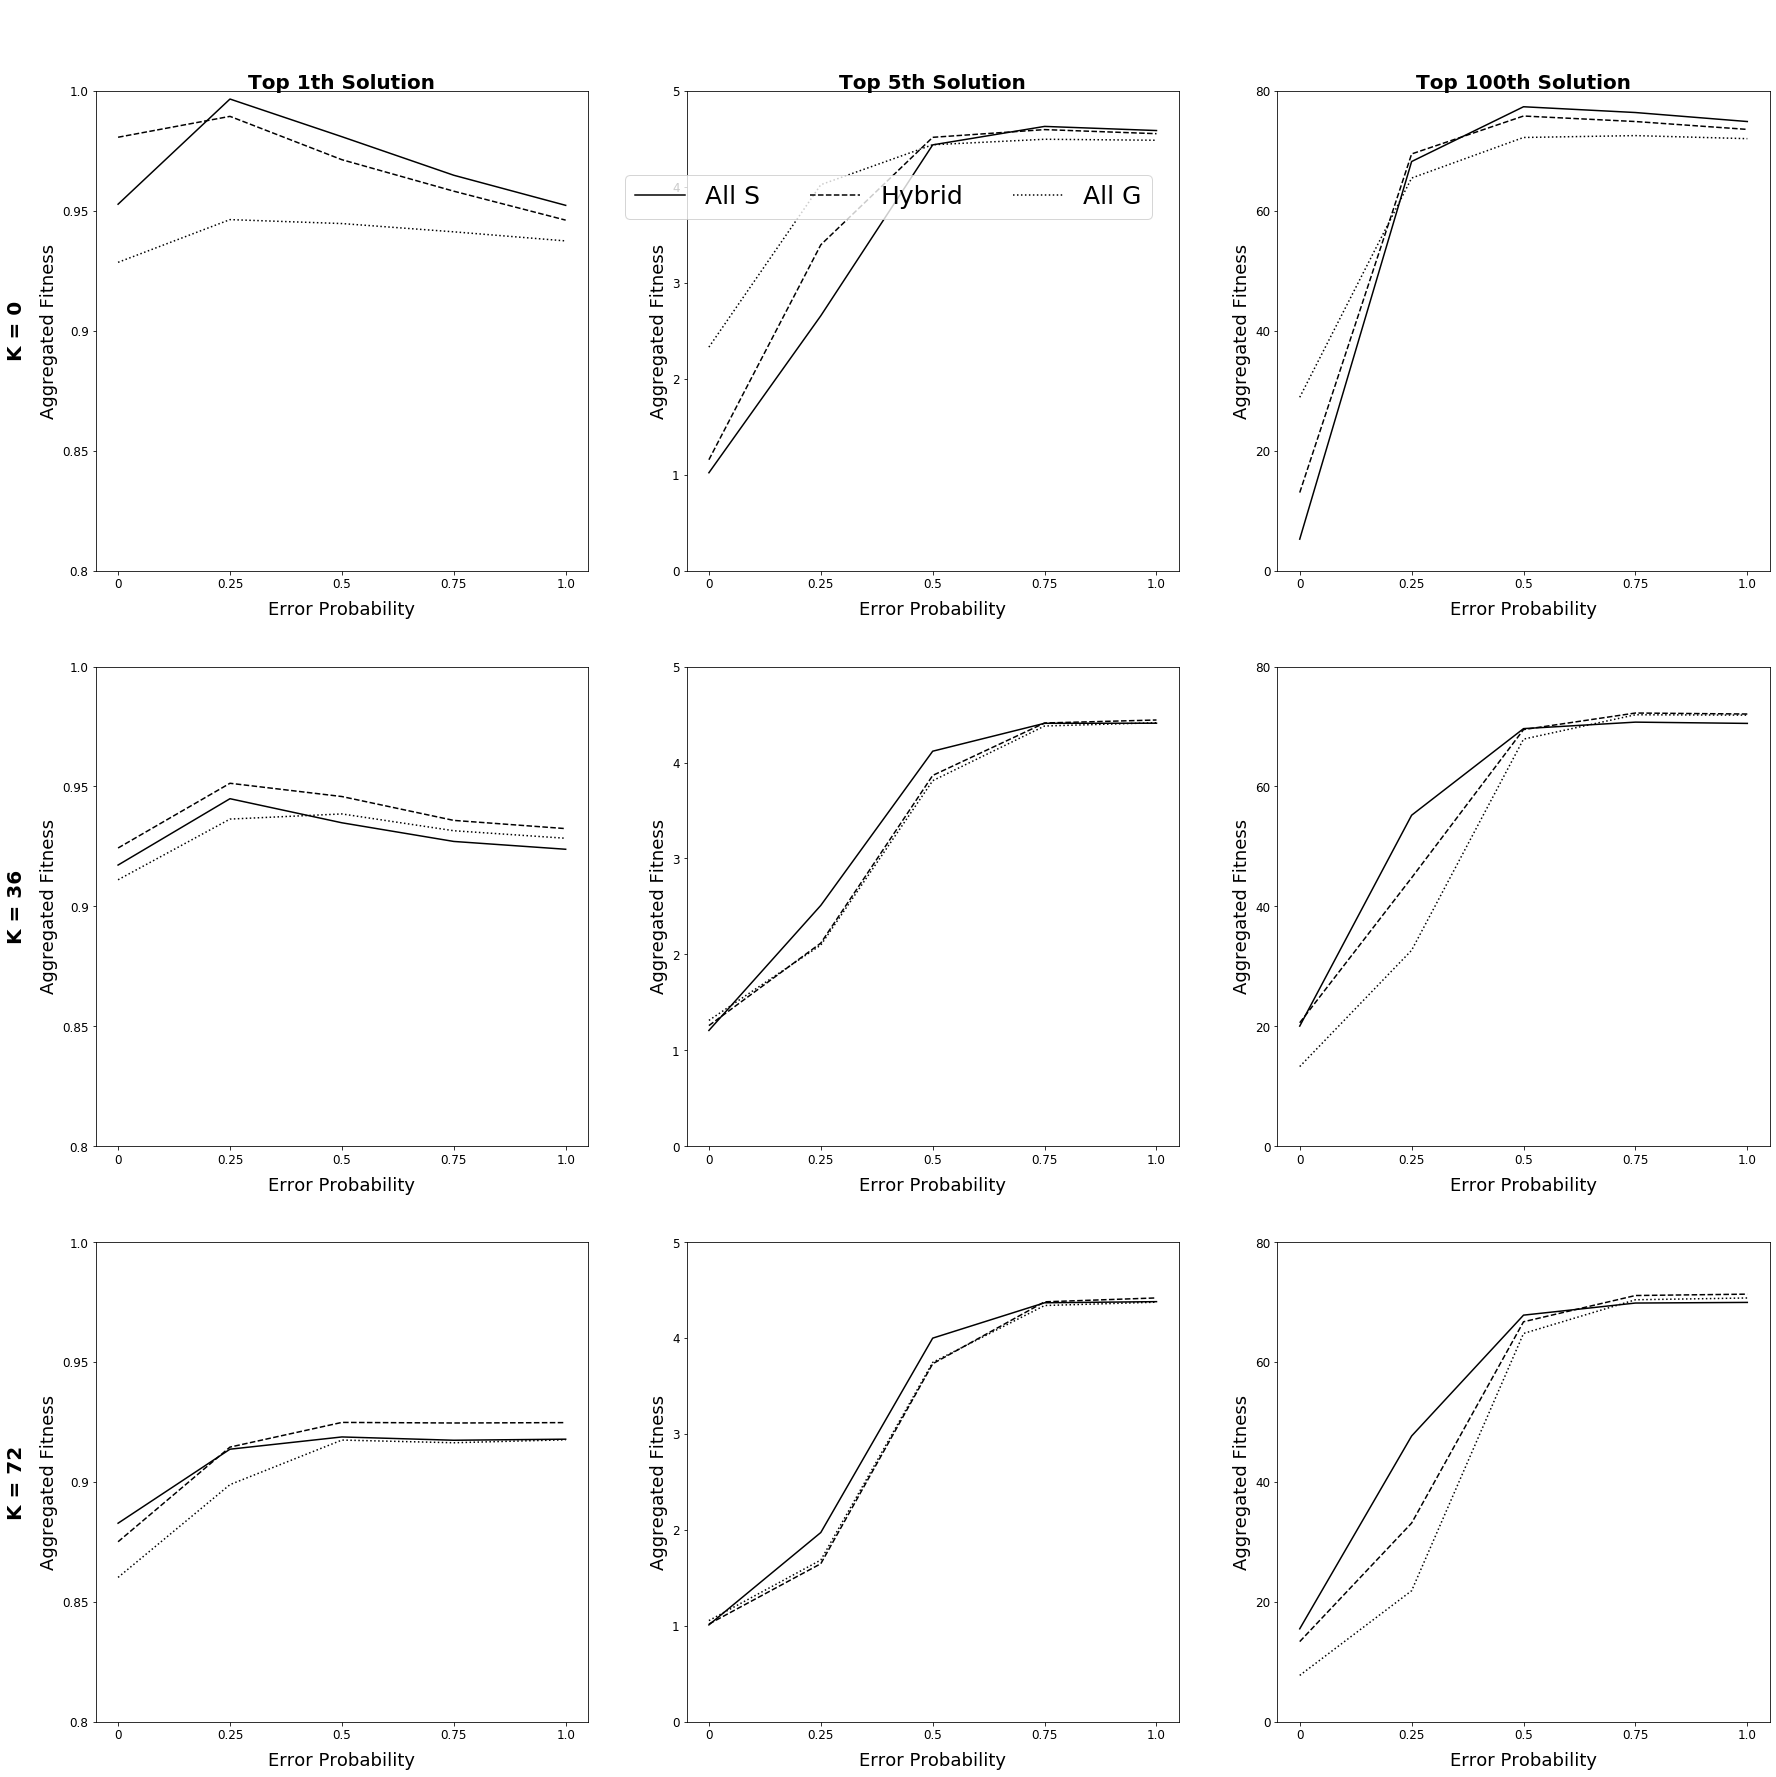

In [174]:
f = plt.figure(figsize=(30, 30))

# platform aggregation 

# used_value
index = [0, 4, 99]

for k in [0, 2, 4]:
    for cur in range(len(index)):
        ax = f.add_subplot(3, len(index), k//2*(len(index))+cur+1)
    
        for proportion in range(5):
            if proportion not in [0, 2, 4]:
                continue
                
            input_res = []
            for openness in range(5):
                
                temp = []
                for copy in range(len(ress)):
                    temp.append(ress[copy][proportion*25+openness*5+k][1][-1][index[cur]])
                
                input_res.append(np.mean(temp))
        
            ax.plot(input_res, color="black", linestyle=line_style[proportion//2], 
                label=labels[proportion//2])
        ax.set_xlabel("Error Probability", fontsize="18", labelpad=10)
        plt.xticks([0, 1, 2, 3, 4], [0, 0.25, 0.5, 0.75, 1.0], fontsize="12")
        
        ax.set_ylim(ylim[cur][0], ylim[cur][1])
        ax.set_ylabel('Aggregated Fitness', fontsize="18")
        ax.set_yticks(zticks[cur])
        ax.set_yticklabels(zticks[cur],fontsize="12")

#         plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.02)
        
#         pad = 5
        
        if k==0:
            ax.annotate("Top %dth Solution"%(index[cur]+1),  xy=(0.5, 0.9), xytext=(0, 50),xycoords='axes fraction', 
                        textcoords='offset points', ha='center', va='baseline', fontsize="20", fontweight="bold")
        if cur==0:
            ax.annotate("K = %d"%(k*18), xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 10, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90, fontsize="20", fontweight='bold')
handles, labels = ax.get_legend_handles_labels()
f.legend(handles, labels, loc='upper center', fontsize="25",ncol=3,borderaxespad=7)
plt.savefig("./ICIS_GST_across_error.png")